In [1]:
import keras
import keras.backend as K
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras import layers
from keras import models, optimizers
from keras.metrics import mse, binary_crossentropy
import os
import sys
import hyperas
module_path = os.path.abspath(os.path.join('./impl/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from impl.DenseNeuralNet import *
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.
/home/ttran/.conda/envs/adaptive_confound_py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Classification

In [24]:
#train_data, test_data = cifar10,
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(cifar10.load_data)

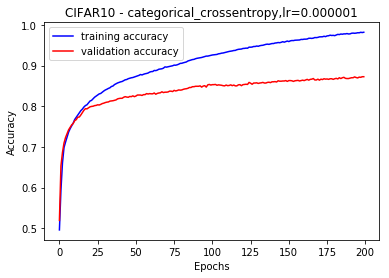

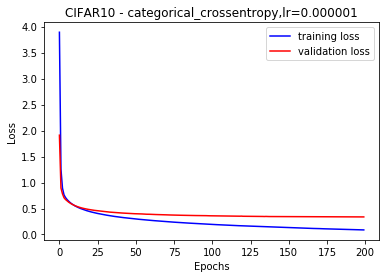

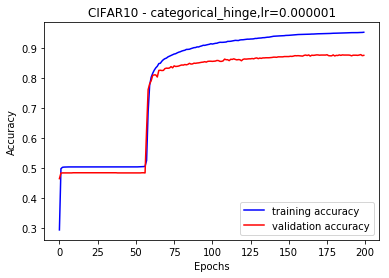

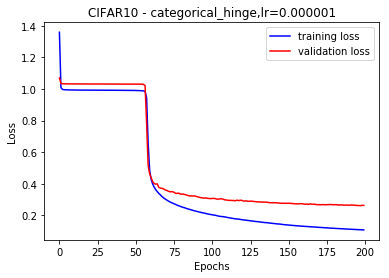

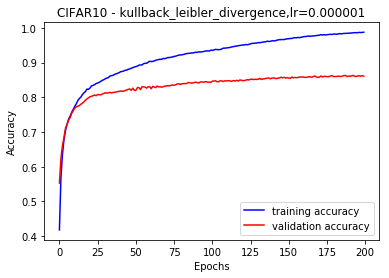

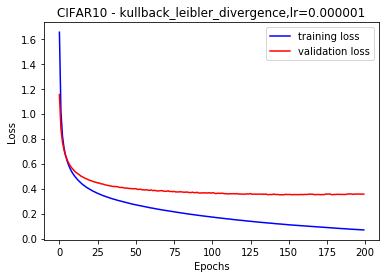

In [26]:
losses = ['categorical_crossentropy', 'categorical_hinge','kullback_leibler_divergence']
for i in tqdm(range(len(losses))):
    loss = losses[i]
    hyperparams = dict(learning_rate=0.000001,loss=loss)
    dnn = DNN(X_train.shape[1],y_train.shape[1], 10, 512)
    dnn.fit(X_train, y_train,hyperparams,epochs=200,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['acc'],'b',label="training accuracy")
    plt.plot(hist['val_acc'],'r',label = "validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title('CIFAR10 - {},lr=0.000001'.format(loss))
    plt.legend()
    plt.savefig('acc_loss={}'.format(loss))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('CIFAR10 - {},lr=0.000001'.format(loss))
    plt.legend()
    plt.savefig('loss_loss={}'.format(loss))
    K.clear_session()
    del dnn

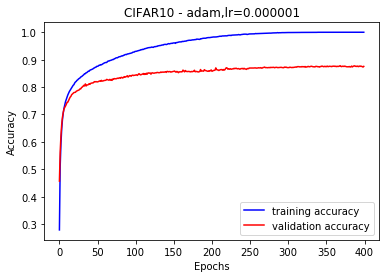

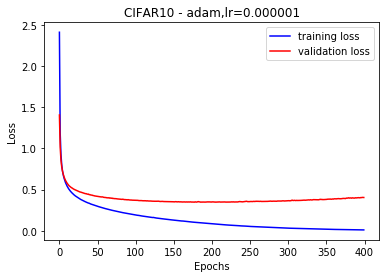

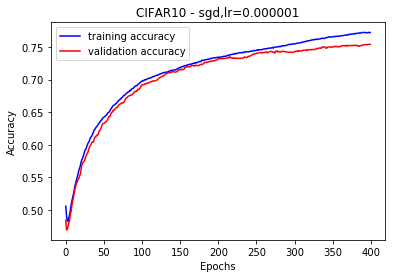

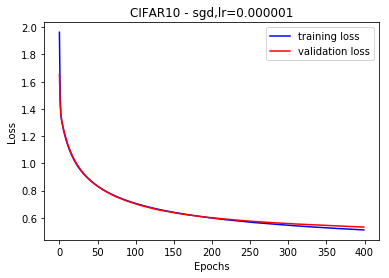

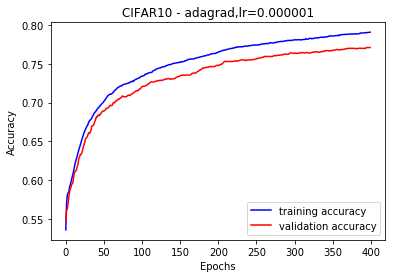

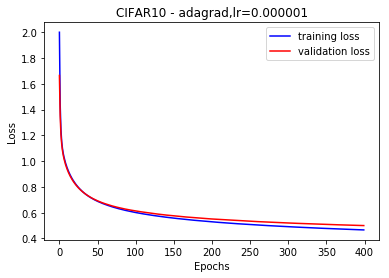

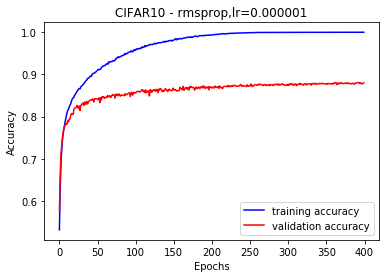

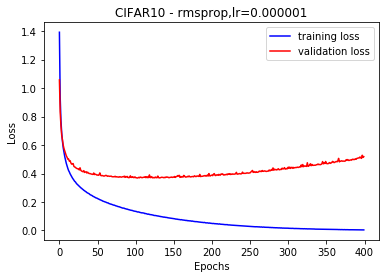

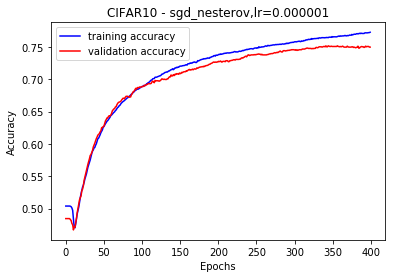

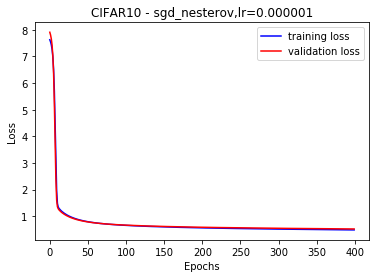

In [4]:
optimizers = ['adam', 'sgd','adagrad','rmsprop','sgd_nesterov']
for i in tqdm(range(len(optimizers))):
    opt = optimizers[i]
    hyperparams = dict(optimizer=opt,learning_rate=0.000001)
    dnn = DNN(X_train.shape[1],y_train.shape[1], 10, 512)
    dnn.fit(X_train, y_train,hyperparams,epochs=400,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['acc'],'b',label="training accuracy")
    plt.plot(hist['val_acc'],'r',label = "validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title('CIFAR10 - {},lr=0.000001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/classification/acc_opt={}'.format(opt))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('CIFAR10 - {},lr=0.000001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/classification/loss_opt={}'.format(opt))
    K.clear_session()
    del dnn

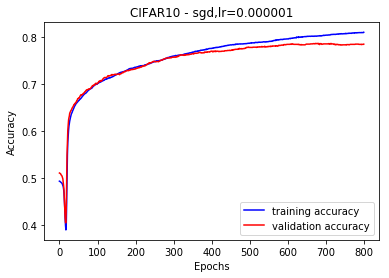

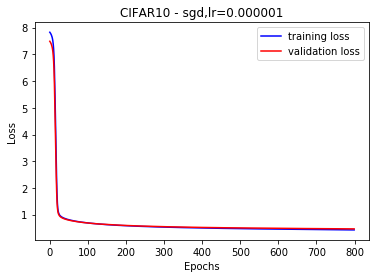

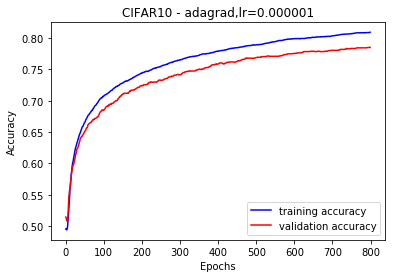

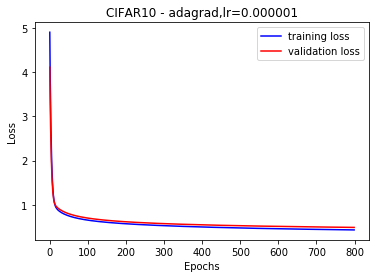

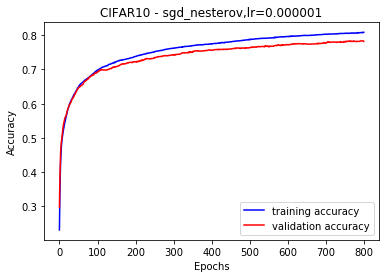

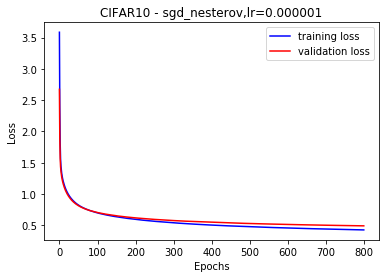

In [4]:
optimizers = ['sgd','adagrad','sgd_nesterov']
for i in tqdm(range(len(optimizers))):
    opt = optimizers[i]
    hyperparams = dict(optimizer=opt,learning_rate=0.000001)
    dnn = DNN(X_train.shape[1],y_train.shape[1], 10, 512)
    dnn.fit(X_train, y_train,hyperparams,epochs=800,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['acc'],'b',label="training accuracy")
    plt.plot(hist['val_acc'],'r',label = "validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title('CIFAR10 - {},lr=0.000001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/classification/acc_opt={}'.format(opt))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('CIFAR10 - {},lr=0.000001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/classification/loss_opt={}'.format(opt))
    K.clear_session()
    del dnn

## Evaluate regularization technique

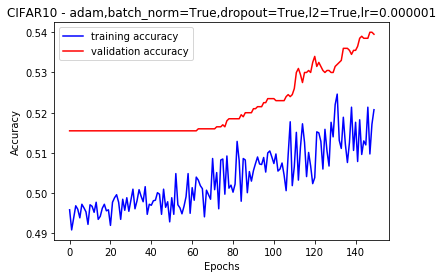

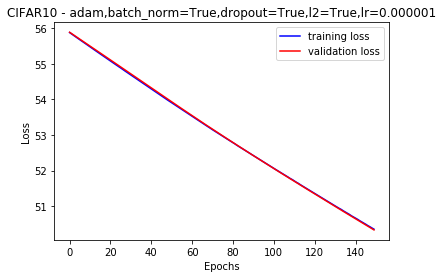

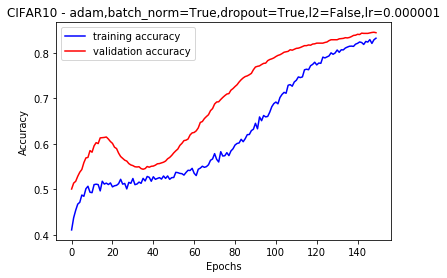

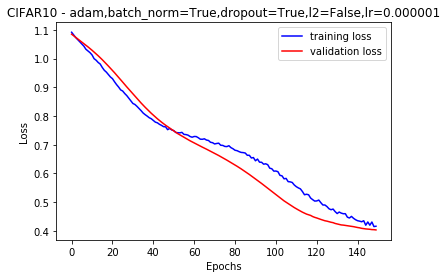

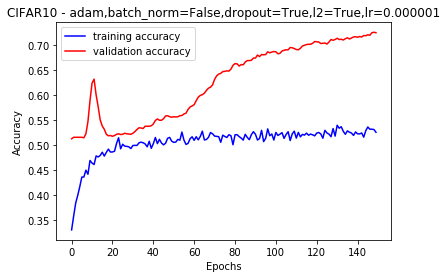

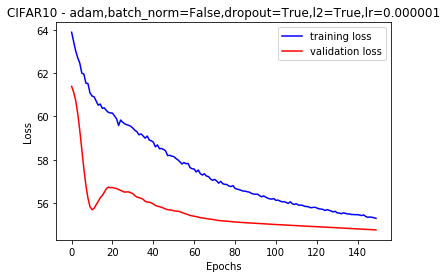

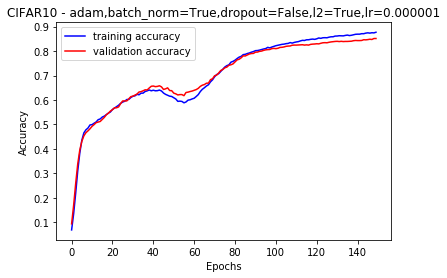

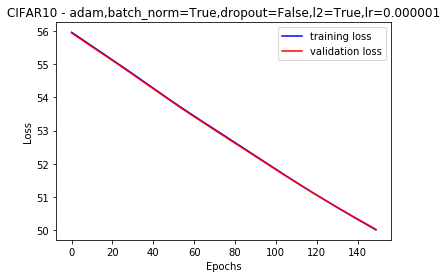

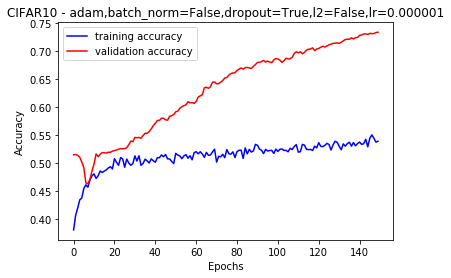

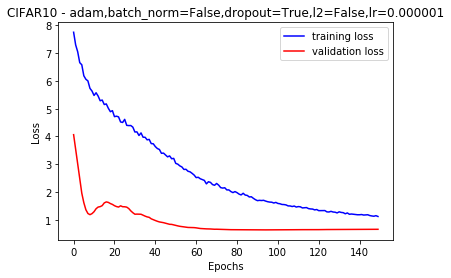

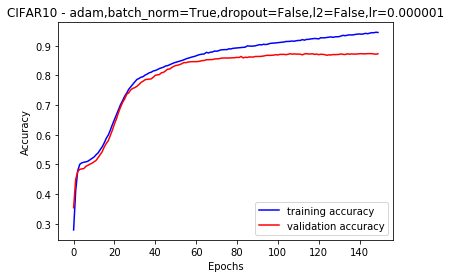

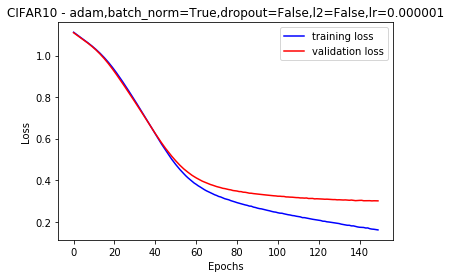

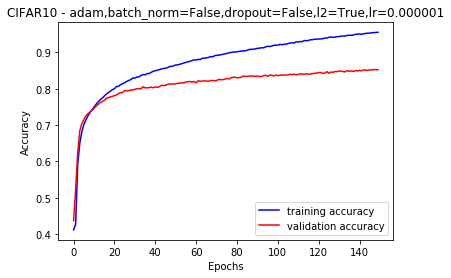

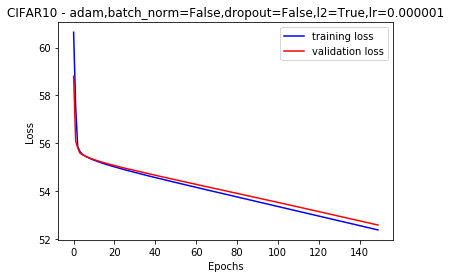

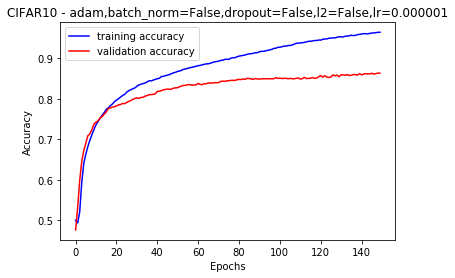

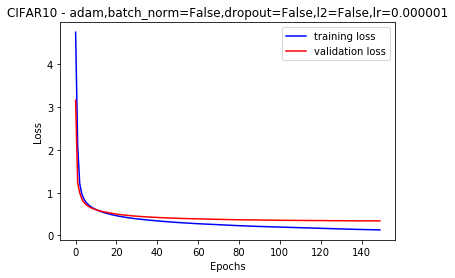

In [4]:
regularizers = [(True,True,True),(True,True,False),(True,False,True),(False,True,True),
                (True,False,False),(False,True,False),(False,False,True),(False, False,False)]
for i in tqdm(range(len(regularizers))):
    drop, batch,l2 = regularizers[i]
    hyperparams = dict(optimizer='adam',learning_rate=0.000001)
    dnn = DNN(X_train.shape[1],y_train.shape[1], 10, 512,dropout=drop,batch_norm=batch,l2=l2)
    dnn.fit(X_train, y_train,hyperparams,epochs=150,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['acc'],'b',label="training accuracy")
    plt.plot(hist['val_acc'],'r',label = "validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title('CIFAR10 - {},batch_norm={},dropout={},l2={},lr=0.000001'.format('adam',batch,drop,l2))
    plt.legend()
    plt.savefig('./regularizer/classification/acc_index={}'.format(i))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('CIFAR10 - {},batch_norm={},dropout={},l2={},lr=0.000001'.format('adam',batch,drop,l2))
    plt.legend()
    plt.savefig('./regularizer/classification/loss_index={}'.format(i))
    K.clear_session()
    del dnn

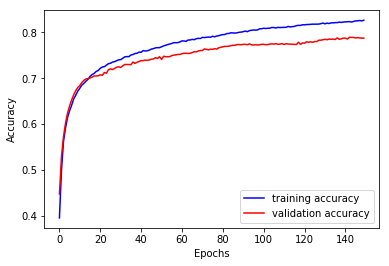

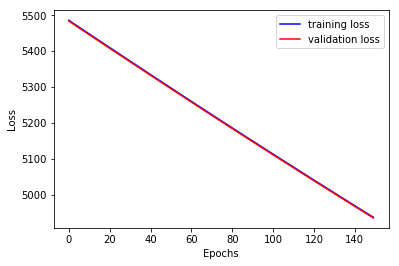

In [4]:
hyperparams = dict(optimizer='adam',learning_rate=0.000001)
dnn = DNN(X_train.shape[1],y_train.shape[1], 10, 512,l2=True)
dnn.fit(X_train, y_train,hyperparams,epochs=150,batch_size=512,verbose=0,validation_data=(X_val,y_val))
hist = dnn.history.history
plt.figure()
plt.plot(hist['acc'],'b',label="training accuracy")
plt.plot(hist['val_acc'],'r',label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.title('CIFAR10 - {},batch_norm={},dropout={},lr=0.000001'.format('adam',batch,drop))
plt.legend()
#plt.savefig('./regularizer/classification/acc_index={}'.format(i))
#dnn.model.save('task1_net.h5')
plt.figure()
plt.plot(hist['loss'],'b',label="training loss")
plt.plot(hist['val_loss'],'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.title('CIFAR10 - {},batch_norm={},dropout={},lr=0.000001'.format('adam',batch,drop))
plt.legend()
#plt.savefig('./regularizer/classification/loss_index={}'.format(i))

# Regression

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
data = data[~np.isnan(data['pm2.5'])].drop(columns=['No','year','month','day','hour'])
data['cbwd'] = LabelEncoder().fit_transform(data['cbwd'])
data = shuffle(data)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
data = data[~np.isnan(data['pm2.5'])].drop(columns=['No','year','month','day','hour'])

In [12]:
data.isnull().any() 

pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [4]:
#<?> normalize input?
split = int(0.8*len(data))
X, y = data.values[:split,1:],data.values[:split,0]
X_test, y_test = data.values[split:,1:],data.values[split:,0]
val_split = int(X.shape[0]*0.8)
X_train, y_train = X[:val_split],y[:val_split]
X_val, y_val = X[val_split:], y[val_split:]

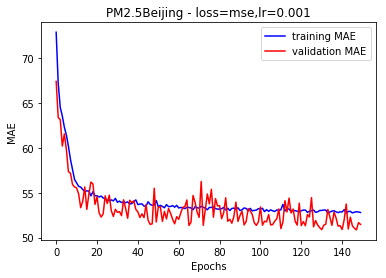

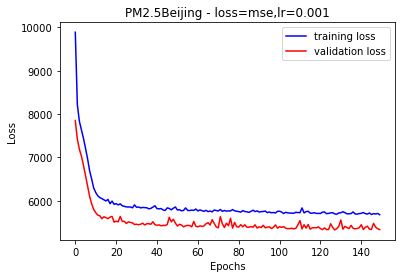

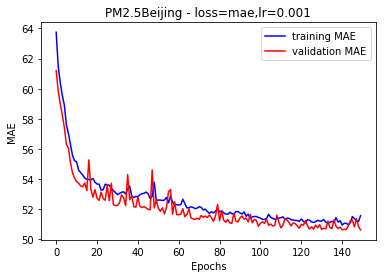

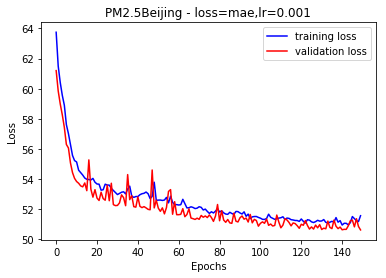

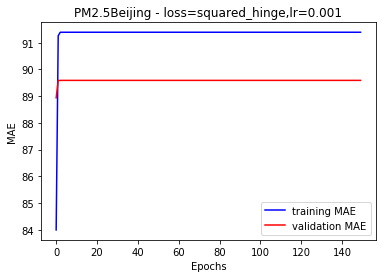

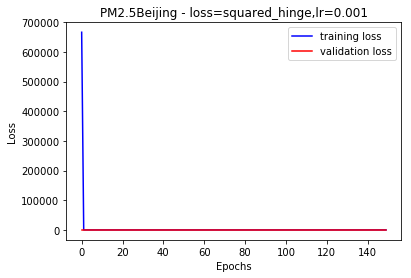

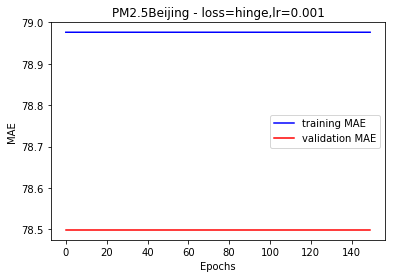

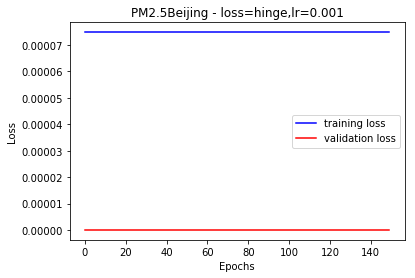

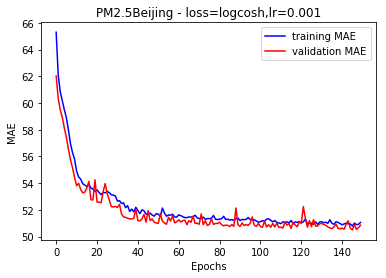

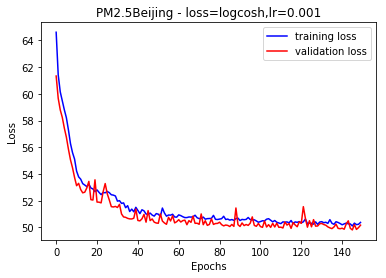

In [153]:
losses = ['mse', 'mae', 'logcosh']
for i in tqdm(range(len(losses))):
    loss = losses[i]
    hyperparams = dict(out_act=None,learning_rate=0.001,loss = loss,metrics=["mae"])
    dnn = DNN(X_train.shape[1],1, 3, 32)
    dnn.fit(X_train, y_train,hyperparams,epochs=150,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['mean_absolute_error'],'b',label="training MAE")
    plt.plot(hist['val_mean_absolute_error'],'r',label = "validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title('PM2.5Beijing - loss={},lr=0.001'.format(loss))
    plt.legend()
    plt.savefig('mae_for_loss={}'.format(loss))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('PM2.5Beijing - loss={},lr=0.001'.format(loss))
    plt.legend()
    plt.savefig('loss_for_loss={}'.format(loss))
    K.clear_session()
    del dnn

In [8]:
hyperparams = dict(out_act=None,learning_rate=0.001,loss = "mse",metrics=["mae"])
dnn = DNN(X_train.shape[1],1, 10, 32)
dnn.fit(X_train, y_train,hyperparams,epochs=150,batch_size=512,verbose=0,validation_data=(X_val,y_val))
hist = dnn.history.history

In [7]:
del dnn
K.clear_session()

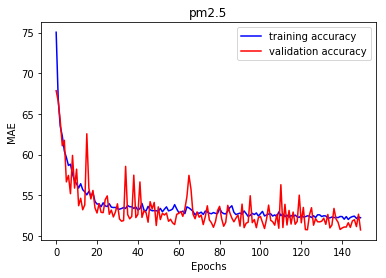

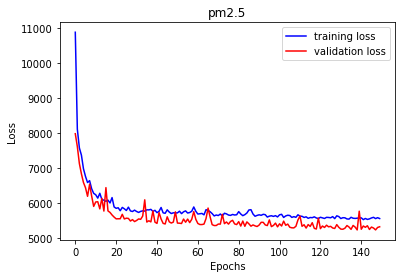

In [9]:
plt.figure()
plt.plot(hist['mean_absolute_error'],'b',label="training accuracy")
plt.plot(hist['val_mean_absolute_error'],'r',label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title('pm2.5')
plt.legend()
#plt.savefig('./optimizers/classification/acc_opt={}'.format(opt))
#dnn.model.save('task1_net.h5')
plt.figure()
plt.plot(hist['loss'],'b',label="training loss")
plt.plot(hist['val_loss'],'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('pm2.5')
plt.legend()
# plt.savefig('./optimizers/classification/loss_opt={}'.format(opt))

## Optimizers

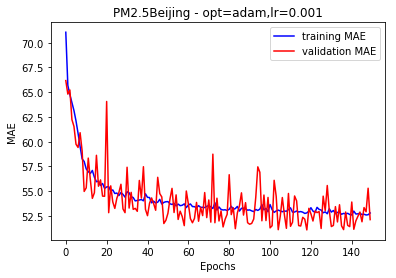

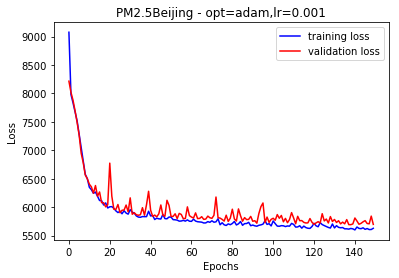

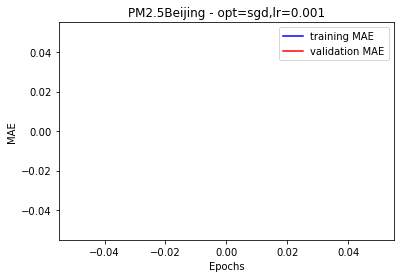

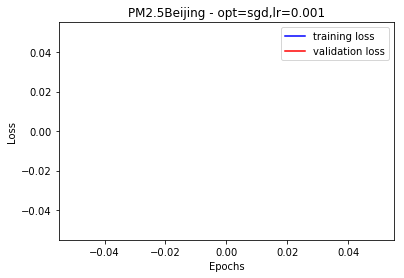

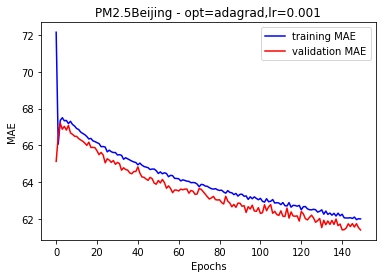

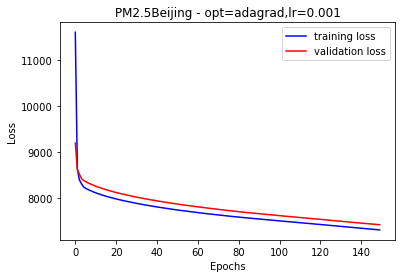

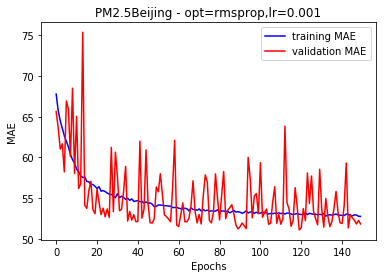

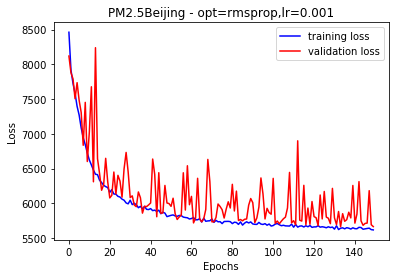

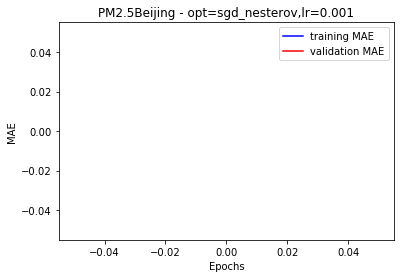

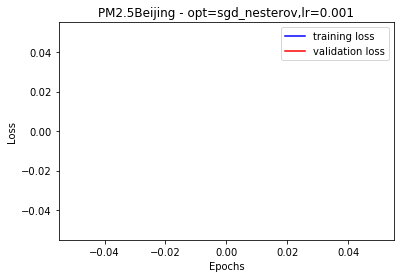

In [12]:
optimizers = ['adam', 'sgd','adagrad','rmsprop','sgd_nesterov']
for i in tqdm(range(len(optimizers))):
    opt = optimizers[i]
    hyperparams = dict(out_act=None,learning_rate=0.001,loss = 'mse',metrics=["mae"],optimizer=opt)
    dnn = DNN(X_train.shape[1],1, 3, 32)
    dnn.fit(X_train, y_train,hyperparams,epochs=150,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['mean_absolute_error'],'b',label="training MAE")
    plt.plot(hist['val_mean_absolute_error'],'r',label = "validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title('PM2.5Beijing - opt={},lr=0.001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/regression/mae_for_opt={}'.format(opt))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('PM2.5Beijing - opt={},lr=0.001'.format(opt))
    plt.legend()
    plt.savefig('./optimizers/regression/loss_for_opt={}'.format(opt))
    K.clear_session()
    del dnn

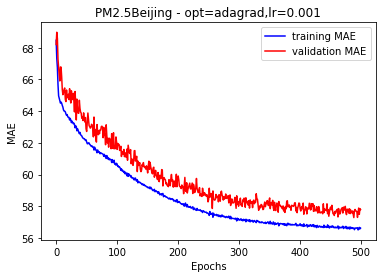

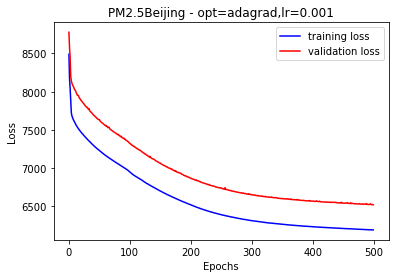

In [51]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
sess = tf.Session(config=config)
set_session(sess)
opt = 'adagrad'
hyperparams = dict(out_act=None,learning_rate=0.001,loss = 'mse',metrics=["mae"],optimizer=opt)
dnn = DNN(X_train.shape[1],1, 3, 32)
dnn.fit(X_train, y_train,hyperparams,epochs=500,batch_size=512,verbose=0,validation_data=(X_val,y_val))
hist = dnn.history.history
plt.figure()
plt.plot(hist['mean_absolute_error'],'b',label="training MAE")
plt.plot(hist['val_mean_absolute_error'],'r',label = "validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title('PM2.5Beijing - opt={},lr=0.001'.format(opt))
plt.legend()
plt.savefig('./optimizers/regression/mae_for_opt={}'.format(opt))
#dnn.model.save('task1_net.h5')
plt.figure()
plt.plot(hist['loss'],'b',label="training loss")
plt.plot(hist['val_loss'],'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('PM2.5Beijing - opt={},lr=0.001'.format(opt))
plt.legend()
plt.savefig('./optimizers/regression/loss_for_opt={}'.format(opt))


In [61]:
K.clear_session()
del dnn

## Regularization:

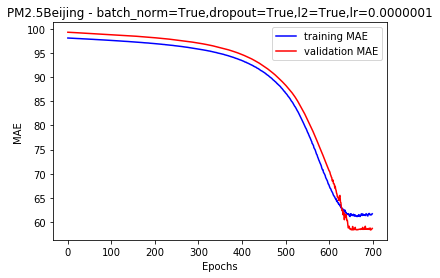

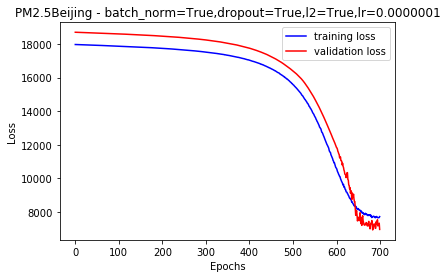

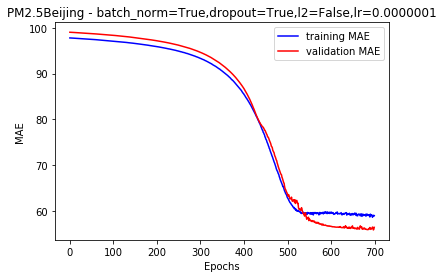

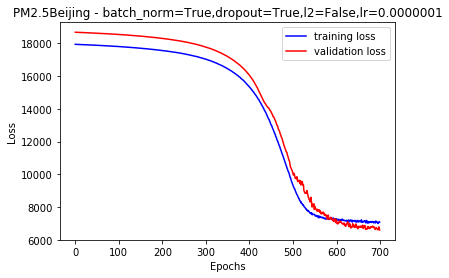

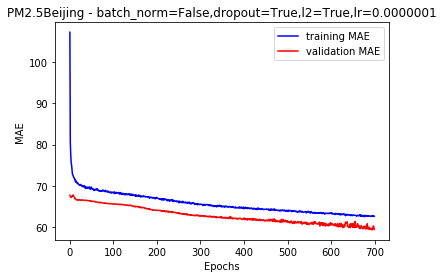

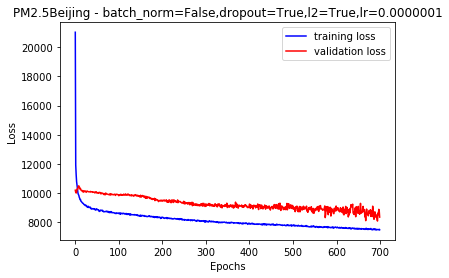

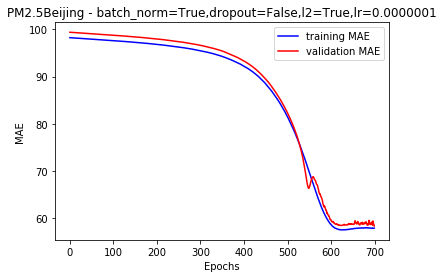

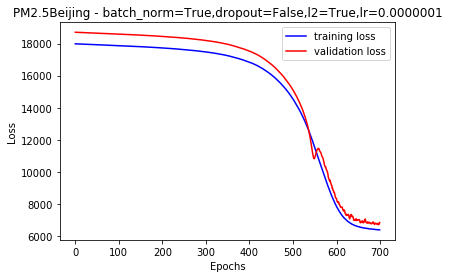

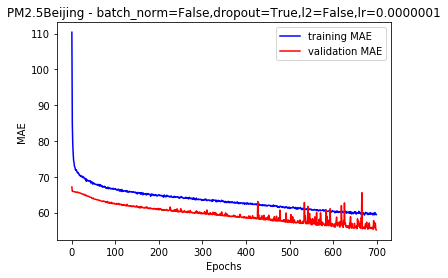

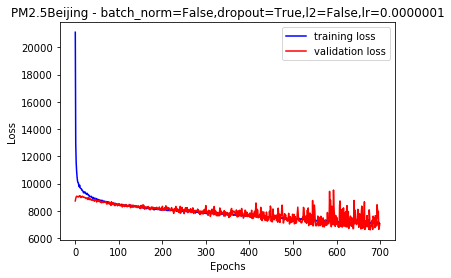

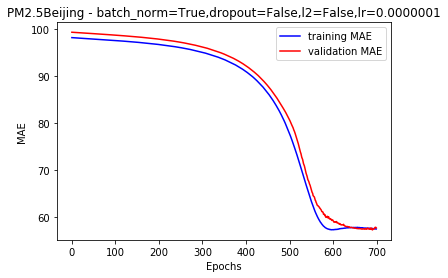

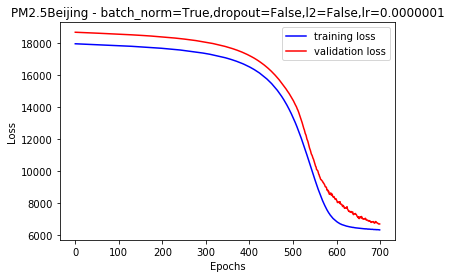

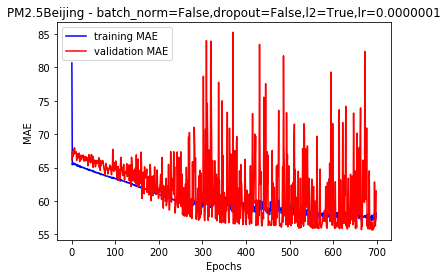

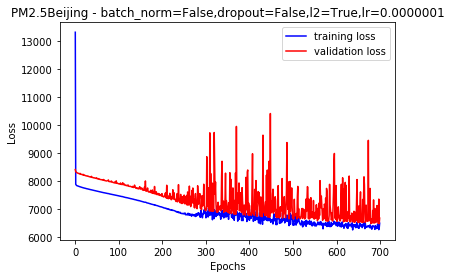

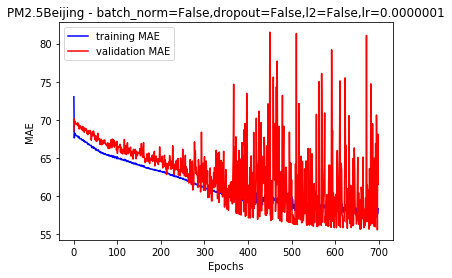

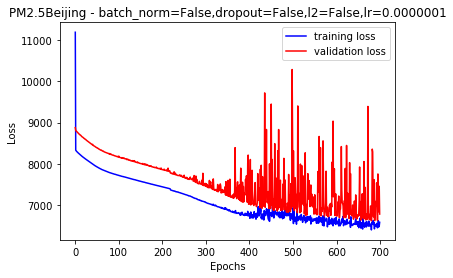

In [62]:
regularizers = [(True,True,True),(True,True,False),(True,False,True),(False,True,True),
                (True,False,False),(False,True,False),(False,False,True),(False, False,False)]
for i in tqdm(range(len(regularizers))):
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.1
    sess = tf.Session(config=config)
    set_session(sess)
    drop, batch,l2 = regularizers[i]
    #yperparams = dict(out_act=None,learning_rate=0.001,loss = 'mse',metrics=["mae"],optimizer='adagrad')
    hyperparams = dict(out_act=None,learning_rate=0.0000001,loss = 'mse',metrics=["mae"],optimizer='sgd')
    dnn = DNN(X_train.shape[1],1, 3, 32,dropout=drop,batch_norm=batch,l2=l2)
    dnn.fit(X_train, y_train,hyperparams,epochs=700,batch_size=512,verbose=0,validation_data=(X_val,y_val))
    hist = dnn.history.history
    plt.figure()
    plt.plot(hist['mean_absolute_error'],'b',label="training MAE")
    plt.plot(hist['val_mean_absolute_error'],'r',label = "validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title('PM2.5Beijing - batch_norm={},dropout={},l2={},lr=0.0000001'.format(batch,drop,l2))
    plt.legend()
    plt.savefig('./regularizer/regression/mae_for_index={}'.format(i))
    #dnn.model.save('task1_net.h5')
    plt.figure()
    plt.plot(hist['loss'],'b',label="training loss")
    plt.plot(hist['val_loss'],'r',label = "validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('PM2.5Beijing - batch_norm={},dropout={},l2={},lr=0.0000001'.format(batch,drop,l2))
    plt.legend()
    plt.savefig('./regularizer/regression/loss_for_index={}'.format(i))
    K.clear_session()
    del dnn

Train on 26724 samples, validate on 6681 samples
Epoch 1/1000
26724/26724 [==============================] - 1s 25us/step - loss: 17965.3644 - mean_absolute_error: 98.1523 - val_loss: 18687.0066 - val_mean_absolute_error: 99.3031
Epoch 2/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17963.8007 - mean_absolute_error: 98.1444 - val_loss: 18685.7717 - val_mean_absolute_error: 99.2969
Epoch 3/1000
26724/26724 [==============================] - 0s 9us/step - loss: 17962.4582 - mean_absolute_error: 98.1376 - val_loss: 18684.6105 - val_mean_absolute_error: 99.2912
Epoch 4/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17961.1322 - mean_absolute_error: 98.1310 - val_loss: 18683.3577 - val_mean_absolute_error: 99.2849
Epoch 5/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17959.5469 - mean_absolute_error: 98.1232 - val_loss: 18681.9563 - val_mean_absolute_error: 99.2780
Epoch 6/1000
26724/26724 [========================

26724/26724 [==============================] - 0s 8us/step - loss: 17900.4018 - mean_absolute_error: 97.8344 - val_loss: 18622.6927 - val_mean_absolute_error: 98.9919
Epoch 47/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17898.8528 - mean_absolute_error: 97.8267 - val_loss: 18621.3212 - val_mean_absolute_error: 98.9856
Epoch 48/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17897.4658 - mean_absolute_error: 97.8203 - val_loss: 18619.8585 - val_mean_absolute_error: 98.9784
Epoch 49/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17895.8631 - mean_absolute_error: 97.8126 - val_loss: 18618.1949 - val_mean_absolute_error: 98.9703
Epoch 50/1000
26724/26724 [==============================] - 0s 7us/step - loss: 17894.2494 - mean_absolute_error: 97.8045 - val_loss: 18616.6619 - val_mean_absolute_error: 98.9626
Epoch 51/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17892.9318 - mean_absolute_e

26724/26724 [==============================] - 0s 9us/step - loss: 17832.9862 - mean_absolute_error: 97.4868 - val_loss: 18554.0842 - val_mean_absolute_error: 98.6406
Epoch 92/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17831.0615 - mean_absolute_error: 97.4769 - val_loss: 18552.4912 - val_mean_absolute_error: 98.6322
Epoch 93/1000
26724/26724 [==============================] - 0s 9us/step - loss: 17829.7769 - mean_absolute_error: 97.4698 - val_loss: 18550.9043 - val_mean_absolute_error: 98.6239
Epoch 94/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17828.4288 - mean_absolute_error: 97.4628 - val_loss: 18549.3930 - val_mean_absolute_error: 98.6157
Epoch 95/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17826.7317 - mean_absolute_error: 97.4539 - val_loss: 18547.9762 - val_mean_absolute_error: 98.6085
Epoch 96/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17825.0817 - mean_absolute_e

26724/26724 [==============================] - 0s 9us/step - loss: 17755.3571 - mean_absolute_error: 97.0747 - val_loss: 18475.9717 - val_mean_absolute_error: 98.2285
Epoch 137/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17753.2920 - mean_absolute_error: 97.0628 - val_loss: 18473.8552 - val_mean_absolute_error: 98.2169
Epoch 138/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17751.1570 - mean_absolute_error: 97.0518 - val_loss: 18471.8997 - val_mean_absolute_error: 98.2063
Epoch 139/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17749.3019 - mean_absolute_error: 97.0413 - val_loss: 18469.9484 - val_mean_absolute_error: 98.1955
Epoch 140/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17747.6246 - mean_absolute_error: 97.0325 - val_loss: 18468.0031 - val_mean_absolute_error: 98.1853
Epoch 141/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17745.4226 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 17657.3877 - mean_absolute_error: 96.5486 - val_loss: 18377.0490 - val_mean_absolute_error: 97.7018
Epoch 182/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17654.5662 - mean_absolute_error: 96.5341 - val_loss: 18374.8102 - val_mean_absolute_error: 97.6897
Epoch 183/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17651.8135 - mean_absolute_error: 96.5189 - val_loss: 18372.1969 - val_mean_absolute_error: 97.6752
Epoch 184/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17649.4709 - mean_absolute_error: 96.5057 - val_loss: 18369.8322 - val_mean_absolute_error: 97.6622
Epoch 185/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17647.2578 - mean_absolute_error: 96.4943 - val_loss: 18367.2481 - val_mean_absolute_error: 97.6485
Epoch 186/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17644.4991 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 17524.2318 - mean_absolute_error: 95.8322 - val_loss: 18243.2557 - val_mean_absolute_error: 96.9841
Epoch 227/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17520.0437 - mean_absolute_error: 95.8100 - val_loss: 18240.1716 - val_mean_absolute_error: 96.9680
Epoch 228/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17517.3567 - mean_absolute_error: 95.7943 - val_loss: 18236.1795 - val_mean_absolute_error: 96.9465
Epoch 229/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17513.6284 - mean_absolute_error: 95.7749 - val_loss: 18233.0333 - val_mean_absolute_error: 96.9302
Epoch 230/1000
26724/26724 [==============================] - 0s 9us/step - loss: 17510.5360 - mean_absolute_error: 95.7577 - val_loss: 18230.0037 - val_mean_absolute_error: 96.9145
Epoch 231/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17506.9754 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 17333.2249 - mean_absolute_error: 94.8010 - val_loss: 18050.6131 - val_mean_absolute_error: 95.9520
Epoch 272/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17326.0314 - mean_absolute_error: 94.7645 - val_loss: 18044.5866 - val_mean_absolute_error: 95.9195
Epoch 273/1000
26724/26724 [==============================] - 0s 9us/step - loss: 17322.3471 - mean_absolute_error: 94.7418 - val_loss: 18039.5353 - val_mean_absolute_error: 95.8928
Epoch 274/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17316.3840 - mean_absolute_error: 94.7118 - val_loss: 18033.7461 - val_mean_absolute_error: 95.8617
Epoch 275/1000
26724/26724 [==============================] - 0s 9us/step - loss: 17310.8812 - mean_absolute_error: 94.6804 - val_loss: 18027.7945 - val_mean_absolute_error: 95.8305
Epoch 276/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17306.7793 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 17039.6213 - mean_absolute_error: 93.2319 - val_loss: 17751.2441 - val_mean_absolute_error: 94.3667
Epoch 317/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17033.1059 - mean_absolute_error: 93.1960 - val_loss: 17742.9529 - val_mean_absolute_error: 94.3235
Epoch 318/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17024.3527 - mean_absolute_error: 93.1526 - val_loss: 17734.0063 - val_mean_absolute_error: 94.2761
Epoch 319/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17015.2952 - mean_absolute_error: 93.1028 - val_loss: 17725.0988 - val_mean_absolute_error: 94.2291
Epoch 320/1000
26724/26724 [==============================] - 0s 8us/step - loss: 17006.8067 - mean_absolute_error: 93.0591 - val_loss: 17716.5952 - val_mean_absolute_error: 94.1850
Epoch 321/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16997.9855 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 16563.5407 - mean_absolute_error: 90.7481 - val_loss: 17256.2004 - val_mean_absolute_error: 91.8297
Epoch 362/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16550.0118 - mean_absolute_error: 90.6782 - val_loss: 17242.8194 - val_mean_absolute_error: 91.7631
Epoch 363/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16536.5149 - mean_absolute_error: 90.6096 - val_loss: 17228.2867 - val_mean_absolute_error: 91.6896
Epoch 364/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16520.4304 - mean_absolute_error: 90.5279 - val_loss: 17212.7031 - val_mean_absolute_error: 91.6109
Epoch 365/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16506.9068 - mean_absolute_error: 90.4559 - val_loss: 17198.2327 - val_mean_absolute_error: 91.5392
Epoch 366/1000
26724/26724 [==============================] - 0s 8us/step - loss: 16492.1850 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 15713.2952 - mean_absolute_error: 86.5154 - val_loss: 16337.1252 - val_mean_absolute_error: 87.3952
Epoch 407/1000
26724/26724 [==============================] - 0s 8us/step - loss: 15687.0963 - mean_absolute_error: 86.3874 - val_loss: 16311.8509 - val_mean_absolute_error: 87.2778
Epoch 408/1000
26724/26724 [==============================] - 0s 8us/step - loss: 15661.6366 - mean_absolute_error: 86.2656 - val_loss: 16281.3222 - val_mean_absolute_error: 87.1368
Epoch 409/1000
26724/26724 [==============================] - 0s 8us/step - loss: 15634.4020 - mean_absolute_error: 86.1386 - val_loss: 16252.7402 - val_mean_absolute_error: 87.0053
Epoch 410/1000
26724/26724 [==============================] - 0s 8us/step - loss: 15608.9798 - mean_absolute_error: 86.0217 - val_loss: 16223.5066 - val_mean_absolute_error: 86.8721
Epoch 411/1000
26724/26724 [==============================] - 0s 8us/step - loss: 15579.5896 - mean_absol

26724/26724 [==============================] - 0s 9us/step - loss: 14033.9915 - mean_absolute_error: 79.1453 - val_loss: 14679.0791 - val_mean_absolute_error: 80.3639
Epoch 452/1000
26724/26724 [==============================] - 0s 8us/step - loss: 13983.5215 - mean_absolute_error: 78.9309 - val_loss: 14687.3501 - val_mean_absolute_error: 80.4097
Epoch 453/1000
26724/26724 [==============================] - 0s 8us/step - loss: 13934.0293 - mean_absolute_error: 78.7360 - val_loss: 14703.4644 - val_mean_absolute_error: 80.4867
Epoch 454/1000
26724/26724 [==============================] - 0s 8us/step - loss: 13882.8150 - mean_absolute_error: 78.5295 - val_loss: 14705.2211 - val_mean_absolute_error: 80.5047
Epoch 455/1000
26724/26724 [==============================] - 0s 8us/step - loss: 13829.7545 - mean_absolute_error: 78.3118 - val_loss: 14719.2427 - val_mean_absolute_error: 80.5653
Epoch 456/1000
26724/26724 [==============================] - 0s 8us/step - loss: 13776.6570 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 11118.4107 - mean_absolute_error: 68.0149 - val_loss: 12248.3778 - val_mean_absolute_error: 71.2625
Epoch 497/1000
26724/26724 [==============================] - 0s 8us/step - loss: 11044.3878 - mean_absolute_error: 67.7624 - val_loss: 12171.9318 - val_mean_absolute_error: 71.0019
Epoch 498/1000
26724/26724 [==============================] - 0s 8us/step - loss: 10967.2912 - mean_absolute_error: 67.4873 - val_loss: 12104.8839 - val_mean_absolute_error: 70.7650
Epoch 499/1000
26724/26724 [==============================] - 0s 8us/step - loss: 10892.6016 - mean_absolute_error: 67.2385 - val_loss: 12042.3202 - val_mean_absolute_error: 70.5493
Epoch 500/1000
26724/26724 [==============================] - 0s 8us/step - loss: 10812.4550 - mean_absolute_error: 66.9569 - val_loss: 11954.7072 - val_mean_absolute_error: 70.2550
Epoch 501/1000
26724/26724 [==============================] - 0s 8us/step - loss: 10740.5322 - mean_absol

26724/26724 [==============================] - 0s 8us/step - loss: 8140.6087 - mean_absolute_error: 59.7471 - val_loss: 8824.6893 - val_mean_absolute_error: 61.5274
Epoch 542/1000
26724/26724 [==============================] - 0s 8us/step - loss: 8095.6620 - mean_absolute_error: 59.6866 - val_loss: 8635.9806 - val_mean_absolute_error: 61.0770
Epoch 543/1000
26724/26724 [==============================] - 0s 8us/step - loss: 8047.9351 - mean_absolute_error: 59.6034 - val_loss: 8745.7021 - val_mean_absolute_error: 61.4120
Epoch 544/1000
26724/26724 [==============================] - 0s 8us/step - loss: 8004.7378 - mean_absolute_error: 59.5460 - val_loss: 8703.3760 - val_mean_absolute_error: 61.3498
Epoch 545/1000
26724/26724 [==============================] - 0s 8us/step - loss: 7961.2669 - mean_absolute_error: 59.4712 - val_loss: 8651.1682 - val_mean_absolute_error: 61.2625
Epoch 546/1000
26724/26724 [==============================] - 0s 8us/step - loss: 7918.4435 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6955.5189 - mean_absolute_error: 58.9054 - val_loss: 7458.4820 - val_mean_absolute_error: 59.9327
Epoch 587/1000
26724/26724 [==============================] - 0s 9us/step - loss: 6943.0684 - mean_absolute_error: 58.9239 - val_loss: 7400.6477 - val_mean_absolute_error: 59.9488
Epoch 588/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6925.5007 - mean_absolute_error: 58.8734 - val_loss: 7304.1447 - val_mean_absolute_error: 60.0051
Epoch 589/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6921.3633 - mean_absolute_error: 58.9166 - val_loss: 7596.1031 - val_mean_absolute_error: 59.9719
Epoch 590/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6911.2186 - mean_absolute_error: 58.9174 - val_loss: 7570.1858 - val_mean_absolute_error: 59.8998
Epoch 591/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6890.8911 - mean_absolute_error: 

26724/26724 [==============================] - 0s 7us/step - loss: 6562.8898 - mean_absolute_error: 58.5189 - val_loss: 6882.2944 - val_mean_absolute_error: 61.7714
Epoch 632/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6556.1848 - mean_absolute_error: 58.4896 - val_loss: 6857.1932 - val_mean_absolute_error: 59.6961
Epoch 633/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6547.9140 - mean_absolute_error: 58.4941 - val_loss: 6835.4590 - val_mean_absolute_error: 59.9441
Epoch 634/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6545.6254 - mean_absolute_error: 58.4484 - val_loss: 6828.4752 - val_mean_absolute_error: 60.1052
Epoch 635/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6544.5161 - mean_absolute_error: 58.4712 - val_loss: 6850.5054 - val_mean_absolute_error: 61.3924
Epoch 636/1000
26724/26724 [==============================] - 0s 9us/step - loss: 6539.4554 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6403.7444 - mean_absolute_error: 58.0210 - val_loss: 6808.0903 - val_mean_absolute_error: 58.3849
Epoch 677/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6393.4721 - mean_absolute_error: 57.9449 - val_loss: 6696.1080 - val_mean_absolute_error: 58.8269
Epoch 678/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6392.0914 - mean_absolute_error: 57.9470 - val_loss: 6677.2370 - val_mean_absolute_error: 59.3027
Epoch 679/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6392.7825 - mean_absolute_error: 57.9575 - val_loss: 6714.1639 - val_mean_absolute_error: 58.7231
Epoch 680/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6385.7489 - mean_absolute_error: 57.9151 - val_loss: 6674.7712 - val_mean_absolute_error: 59.9704
Epoch 681/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6388.4045 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6300.5645 - mean_absolute_error: 57.4443 - val_loss: 6675.2899 - val_mean_absolute_error: 57.7021
Epoch 722/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6292.7421 - mean_absolute_error: 57.4024 - val_loss: 7392.1874 - val_mean_absolute_error: 68.1551
Epoch 723/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6298.0033 - mean_absolute_error: 57.4505 - val_loss: 6612.0300 - val_mean_absolute_error: 57.9780
Epoch 724/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6293.6887 - mean_absolute_error: 57.4288 - val_loss: 6689.4993 - val_mean_absolute_error: 57.6904
Epoch 725/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6294.9736 - mean_absolute_error: 57.4003 - val_loss: 6684.0578 - val_mean_absolute_error: 61.0929
Epoch 726/1000
26724/26724 [==============================] - 0s 9us/step - loss: 6288.0245 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6231.6443 - mean_absolute_error: 56.9806 - val_loss: 6531.6457 - val_mean_absolute_error: 57.6220
Epoch 767/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6230.6434 - mean_absolute_error: 56.9421 - val_loss: 6558.1198 - val_mean_absolute_error: 57.4995
Epoch 768/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6234.7307 - mean_absolute_error: 56.9763 - val_loss: 6814.5618 - val_mean_absolute_error: 56.9886
Epoch 769/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6230.0019 - mean_absolute_error: 56.9481 - val_loss: 6724.4226 - val_mean_absolute_error: 56.9831
Epoch 770/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6228.7272 - mean_absolute_error: 56.9076 - val_loss: 6684.2414 - val_mean_absolute_error: 61.4408
Epoch 771/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6225.5389 - mean_absolute_error: 

26724/26724 [==============================] - 0s 7us/step - loss: 6190.3606 - mean_absolute_error: 56.6033 - val_loss: 6490.6241 - val_mean_absolute_error: 57.7977
Epoch 812/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6186.9498 - mean_absolute_error: 56.5962 - val_loss: 6811.3778 - val_mean_absolute_error: 56.7097
Epoch 813/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6184.2462 - mean_absolute_error: 56.5535 - val_loss: 7057.7422 - val_mean_absolute_error: 57.0020
Epoch 814/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6187.9913 - mean_absolute_error: 56.5684 - val_loss: 6485.0012 - val_mean_absolute_error: 58.7819
Epoch 815/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6181.9410 - mean_absolute_error: 56.5536 - val_loss: 6567.1899 - val_mean_absolute_error: 60.2115
Epoch 816/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6184.2599 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6148.5595 - mean_absolute_error: 56.2712 - val_loss: 6564.8525 - val_mean_absolute_error: 56.4505
Epoch 857/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6147.2427 - mean_absolute_error: 56.2684 - val_loss: 6433.4581 - val_mean_absolute_error: 57.6956
Epoch 858/1000
26724/26724 [==============================] - 0s 9us/step - loss: 6154.6247 - mean_absolute_error: 56.3065 - val_loss: 6741.2949 - val_mean_absolute_error: 56.4129
Epoch 859/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6152.4717 - mean_absolute_error: 56.2796 - val_loss: 7464.1381 - val_mean_absolute_error: 68.5460
Epoch 860/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6147.1598 - mean_absolute_error: 56.2963 - val_loss: 6441.9623 - val_mean_absolute_error: 57.1500
Epoch 861/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6146.9083 - mean_absolute_error: 

26724/26724 [==============================] - 0s 7us/step - loss: 6120.1320 - mean_absolute_error: 56.0426 - val_loss: 6495.8656 - val_mean_absolute_error: 56.4261
Epoch 902/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6123.2711 - mean_absolute_error: 56.0393 - val_loss: 6407.2306 - val_mean_absolute_error: 57.7247
Epoch 903/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6129.4465 - mean_absolute_error: 56.0980 - val_loss: 6471.4187 - val_mean_absolute_error: 56.4282
Epoch 904/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6126.0844 - mean_absolute_error: 56.0656 - val_loss: 6696.6758 - val_mean_absolute_error: 56.2204
Epoch 905/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6130.2266 - mean_absolute_error: 56.1048 - val_loss: 6595.8546 - val_mean_absolute_error: 56.1806
Epoch 906/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6119.8861 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6093.4432 - mean_absolute_error: 55.8442 - val_loss: 6960.4580 - val_mean_absolute_error: 64.4060
Epoch 947/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6101.1039 - mean_absolute_error: 55.8980 - val_loss: 6512.4472 - val_mean_absolute_error: 59.7200
Epoch 948/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6100.1581 - mean_absolute_error: 55.9027 - val_loss: 6643.3296 - val_mean_absolute_error: 61.1346
Epoch 949/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6100.9112 - mean_absolute_error: 55.9122 - val_loss: 6655.3058 - val_mean_absolute_error: 61.5387
Epoch 950/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6101.9688 - mean_absolute_error: 55.9033 - val_loss: 6608.6539 - val_mean_absolute_error: 60.9701
Epoch 951/1000
26724/26724 [==============================] - 0s 7us/step - loss: 6094.0469 - mean_absolute_error: 

26724/26724 [==============================] - 0s 8us/step - loss: 6073.3340 - mean_absolute_error: 55.6933 - val_loss: 6470.7692 - val_mean_absolute_error: 59.3216
Epoch 992/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6082.4337 - mean_absolute_error: 55.7473 - val_loss: 8223.4987 - val_mean_absolute_error: 73.7641
Epoch 993/1000
26724/26724 [==============================] - 0s 9us/step - loss: 6085.0256 - mean_absolute_error: 55.7587 - val_loss: 6900.0251 - val_mean_absolute_error: 56.0391
Epoch 994/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6082.8224 - mean_absolute_error: 55.7409 - val_loss: 6372.3703 - val_mean_absolute_error: 57.7017
Epoch 995/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6074.6204 - mean_absolute_error: 55.7033 - val_loss: 6411.8780 - val_mean_absolute_error: 56.0996
Epoch 996/1000
26724/26724 [==============================] - 0s 8us/step - loss: 6075.2666 - mean_absolute_error: 

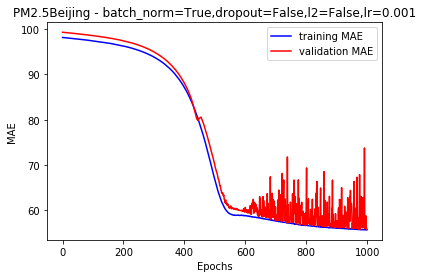

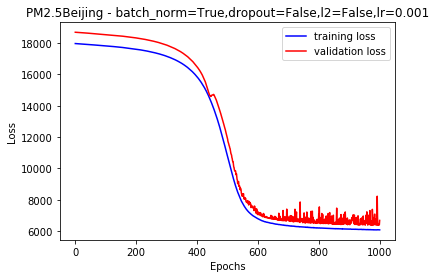

In [57]:
regularizers = [(True,True,True),(True,True,False),(True,False,True),(False,True,True),
                (True,False,False),(False,True,False),(False,False,True),(False, False,False)]

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
sess = tf.Session(config=config)
set_session(sess)
drop, batch,l2 = regularizers[5]
#yperparams = dict(out_act=None,learning_rate=0.001,loss = 'mse',metrics=["mae"],optimizer='adagrad')
hyperparams = dict(out_act=None,learning_rate=0.0000001,loss = 'mse',metrics=["mae"],optimizer='sgd')
dnn = DNN(X_train.shape[1],1, 3, 32,dropout=drop,batch_norm=batch,l2=l2)
dnn.fit(X_train, y_train,hyperparams,epochs=700,batch_size=512,verbose=1,validation_data=(X_val,y_val))
hist = dnn.history.history
plt.figure()
plt.plot(hist['mean_absolute_error'],'b',label="training MAE")
plt.plot(hist['val_mean_absolute_error'],'r',label = "validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title('PM2.5Beijing - batch_norm={},dropout={},l2={},lr=0.0000001'.format(batch,drop,l2))
plt.legend()
plt.savefig('./regularizer/regression/mae_for_index={}'.format(5))
#dnn.model.save('task1_net.h5')
plt.figure()
plt.plot(hist['loss'],'b',label="training loss")
plt.plot(hist['val_loss'],'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('PM2.5Beijing - batch_norm={},dropout={},l2={},lr=0.0000001'.format(batch,drop,l2))
plt.legend()
plt.savefig('./regularizer/regression/loss_for_index={}'.format(5))